<a href="https://colab.research.google.com/github/mmonch/Sidecar_Project/blob/main/notebooks/Sidecar_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Q0'></a>
<center><a target="_blank" href="https://sit.academy/"><img src="https://drive.google.com/uc?id=1z0U84GYqhbWWpCenFajh8_8XFRGyOc3U" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>
<center> <h1> Notebook 1: Sidecar Data Exploration </h1> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>SIT Academy, 2022</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> Short description of the aim of the notebook</p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#I'>Introduction </a> </li>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>Part 1</a></li>
            <li> <a style="color:#303030" href='#P2'>Part 2</a></li>
            <li> <a style="color:#303030" href='#P3'>Part 3</a></li>
            <li> <a style="color:#303030" href='#CL'>Conclusion</a></li>
        </ol>
        <strong>Keywords:</strong> data cleaning, NLP, ... list of keywords.
    </div>
</div>
</nav>

<a id='I' name="I"></a>
## [Introduction](#P0)

Sources:
https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
https://loeb.nyc/blog/data-science-word-expander
https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0
https://towardsdatascience.com/guide-to-fine-tuning-text-generation-models-gpt-2-gpt-neo-and-t5-dc5de6b3bc5e
https://www.machinecurve.com/index.php/2020/12/29/differences-between-autoregressive-autoencoding-and-sequence-to-sequence-models-in-machine-learning/

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Magics

In [1]:
pip install nb_black

     |████████████████████████████████| 1.4 MB 10.0 MB/s 
     |████████████████████████████████| 843 kB 65.4 MB/s 
     |████████████████████████████████| 97 kB 8.0 MB/s 
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5297 sha256=6508d64b45c5db69a77a409ec99b2ee690295b3055119bf3c87ff75db6a9dbf4
  Stored in directory: /root/.cache/pip/wheels/1e/b2/88/51c66d23ea5fd0d40ed50997555e15d981d92671376a9a412a
Successfully built nb-black
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.


In [2]:
# auto reload packages and modules when they are modified
%load_ext autoreload
%autoreload 2
# draw matplotlib plots in line
%matplotlib inline
# enforce PEP 8 code on jupyter lab ...
#%load_ext lab_black
# ... or jupyter notebook
#%load_ext nb_black

# Colab setup ------------------
import os, sys, subprocess
if "google.colab" in sys.modules:
    cmd = "pip install --upgrade watermark blackcellmagic"
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)

#%load_ext blackcellmagic

In [3]:
!pip install contractions

     |████████████████████████████████| 321 kB 13.0 MB/s 
     |████████████████████████████████| 284 kB 49.0 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85447 sha256=c6eb2a6d52461becdcb06f273e85903f3dbb9c57caa46eb44cb4b5def6cd18e6
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [4]:
!pip install nltk>=3.2.1


### Packages

In [5]:
# General
import pandas as pd
import numpy as np

# modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata

### Custom classes and functions

### Global Parameters Setting

In [6]:
plt.style.use("seaborn")

### User-Dependent Variables

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
data = pd.read_csv("gdrive/My Drive/SIDECAR_P/Sidecar_Data_Sample.csv")

<a id='P1'></a>
## [Part one](#P0)

Here you could write a paragraph on the aim of part one. You could also have some nice figures



In [9]:
#%load_ext google.colab.data_table

data


,Domain_Id,Domain_Name,Domain_Desc,Domain_Code,Domain_Status,Domain_Status_Code,Application_Id,Application_Name,Application_Code,Application_Desc,Application_Status,Application_Status_Code,Asset_Id,Asset_Technical_Name,Asset_Business_Name,Asset_Business_Desc,Asset_Status,Asset_Status_Code,Asset_Server_Name,Asset_Database,Asset_Schema,Asset_Type_Id,Asset_Type_Name,Asset_Type_Desc,Privacy_Level_Id,Asset_Privacy_Level,Asset_Privacy_Desc,Attribute_Id,Attribute_Technical_Name,Attribute_Business_Name,Attribute_Business_Desc,Attribute_Business_Rule,Attribute_Data_Type,Attribute_IsPK,Attribute_IsNullable,Attribute_Status,Attribute_Status_Code
0,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,1,ID,Technical Id of the patient,The Primary Key (surrogate unique identifier) ...,NaN,NUMBER (38),Yes,Yes,Active,1
1,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,2,GNDR_CD,Gender Code,Code of GENDER CODE defined as: The gender of ...,"If Gender code = M then Male, F = Female, or U...",VARCHAR2 (80),No,No,Active,1
2,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,3,LIVG_ARNGMNT_CD,Living arrangement,Code of LIVING ARRANGEMENT CODE defined as: A ...,NaN,VARCHAR2 (80),No,No,Active,1
3,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,4,MRTL_STUS_CD,Marital status code,Code of MARITAL STATUS CODE defined as: Party'...,NaN,VARCHAR2 (80),No,No,Active,1
4,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,5,OCUPATN_CD,Occupation code,Code of OCCUPATION CODE defined as: The occupa...,NaN,VARCHAR2 (80),No,No,Active,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,106,Config_AssetList,Configuration asset list,Contains all the required parameters to launch...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4456,Config_AssetList_Data_Source,Config AssetList Data Source,Data source for the scan,NaN,nvarchar (64),No,Yes,Active,1
4129,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,87,Attribute,Attribute,Contains the list of attributes that character...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4457,Attribute_Sample_Data,Attribute sample data,Sample data of the attribute.,NaN,nvarchar (MAX),No,Yes,Active,1
4130,7,ICT,ICT department,I

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Domain_Id                 4133 non-null   int64 
 1   Domain_Name               4133 non-null   object
 2   Domain_Desc               4133 non-null   object
 3   Domain_Code               4133 non-null   object
 4   Domain_Status             4133 non-null   object
 5   Domain_Status_Code        4133 non-null   int64 
 6   Application_Id            4133 non-null   int64 
 7   Application_Name          4133 non-null   object
 8   Application_Code          4133 non-null   object
 9   Application_Desc          4133 non-null   object
 10  Application_Status        4133 non-null   object
 11  Application_Status_Code   4133 non-null   int64 
 12  Asset_Id                  4133 non-null   int64 
 13  Asset_Technical_Name      4133 non-null   object
 14  Asset_Business_Name     

In [11]:
data.describe()

,Domain_Id,Domain_Status_Code,Application_Id,Application_Status_Code,Asset_Id,Asset_Status_Code,Asset_Type_Id,Privacy_Level_Id,Attribute_Id,Attribute_Status_Code
count,4133.000000,4133.0,4133.000000,4133.0,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,7.288168,1.0,32.568836,1.0,217.097992,1.008226,1.189451,-0.331720,2173.253327,1.009436
std,3.175863,0.0,19.112937,0.0,129.265674,0.128020,0.391914,1.417479,1294.975998,0.136184
min,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000
25%,7.000000,1.0,15.000000,1.0,109.000000,1.000000,1.000000,-1.000000,1039.000000,1.000000
50%,7.000000,1.0,25.000000,1.0,222.000000,1.000000,1.000000,-1.000000,2145.000000,1.000000
75%,7.000000,1.0,52.000000,1.0,320.000000,1.000000,1.000000,-1.000000,3195.000000,1.000000
max,19.000000,1.0,56.000000,1.0,428.000000,3.000000,2.000000,4.000000,4460.000000,3.000000


In [12]:
data.isnull().any()

Domain_Id                   False
Domain_Name                 False
Domain_Desc                 False
Domain_Code                 False
Domain_Status               False
Domain_Status_Code          False
Application_Id              False
Application_Name            False
Application_Code            False
Application_Desc            False
Application_Status          False
Application_Status_Code     False
Asset_Id                    False
Asset_Technical_Name        False
Asset_Business_Name         False
Asset_Business_Desc          True
Asset_Status                False
Asset_Status_Code           False
Asset_Server_Name           False
Asset_Database              False
Asset_Schema                False
Asset_Type_Id               False
Asset_Type_Name             False
Asset_Type_Desc             False
Privacy_Level_Id            False
Asset_Privacy_Level         False
Asset_Privacy_Desc          False
Attribute_Id                False
Attribute_Technical_Name    False
Attribute_Busi

In [13]:
is_na = data[data.isna().any(axis=1)]

In [14]:
len(is_na)

3792

In [15]:
is_na.tail()

,Domain_Id,Domain_Name,Domain_Desc,Domain_Code,Domain_Status,Domain_Status_Code,Application_Id,Application_Name,Application_Code,Application_Desc,Application_Status,Application_Status_Code,Asset_Id,Asset_Technical_Name,Asset_Business_Name,Asset_Business_Desc,Asset_Status,Asset_Status_Code,Asset_Server_Name,Asset_Database,Asset_Schema,Asset_Type_Id,Asset_Type_Name,Asset_Type_Desc,Privacy_Level_Id,Asset_Privacy_Level,Asset_Privacy_Desc,Attribute_Id,Attribute_Technical_Name,Attribute_Business_Name,Attribute_Business_Desc,Attribute_Business_Rule,Attribute_Data_Type,Attribute_IsPK,Attribute_IsNullable,Attribute_Status,Attribute_Status_Code
4128,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,106,Config_AssetList,Configuration asset list,Contains all the required parameters to launch...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4456,Config_AssetList_Data_Source,Config AssetList Data Source,Data source for the scan,NaN,nvarchar (64),No,Yes,Active,1
4129,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,87,Attribute,Attribute,Contains the list of attributes that character...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4457,Attribute_Sample_Data,Attribute sample data,Sample data of the attribute.,NaN,nvarchar (MAX),No,Yes,Active,1
4130,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,81,Property,Custom properties,This table contains the all custom properties ...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4458,Property_IsDQ,Property IsDQ,Flag that indicates if the property is a data ...,NaN,bit,No,Yes,Active,1
4131,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,81,Property,Custom properties,This table contains the all custom properties ...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4459,Property_DQ_Calculation,Property DQ Calculation,Data quality calculation of the custom property,NaN,varchar (50),No,Yes,Active,1
4132,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,81,Property,Custom properties,This table contains the all custom properties ...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4460,Property_DQ_Output_Format,Property DQ Output Format,Data quality output format of the custom property,NaN,varchar (20),No,Yes,Active,1


In [ ]:
np.sort(data["Asset_Id"].unique())

In [ ]:
# how many values per column, value_counts() per feature
# plot distributions barplot or histogramm
for col in data.columns:
  print (f"Column Name, Number of unique values: \n{col}, {data[col].nunique()}\nValue Counts: \n{data[col].value_counts()}\n\n----------------------")

In [18]:
data["Attribute_Technical_Name"].value_counts()

ModifiedDate            73
SYS_LastModified        49
LastEditedBy            49
SYS_LastModifiedBy      46
ValidFrom               38
                        ..
cumulative_intensity     1
intensity_level          1
incompatibility          1
side_b_2nd               1
Property_IsDQ            1
Name: Attribute_Technical_Name, Length: 1998, dtype: int64

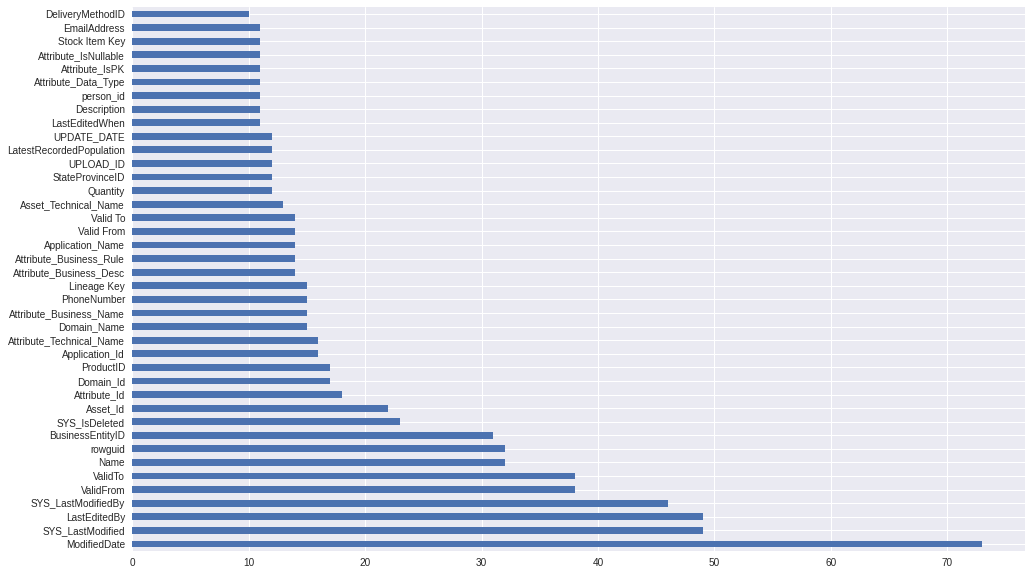

In [19]:
data["Attribute_Technical_Name"].value_counts()[:40].plot(kind="barh")
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()

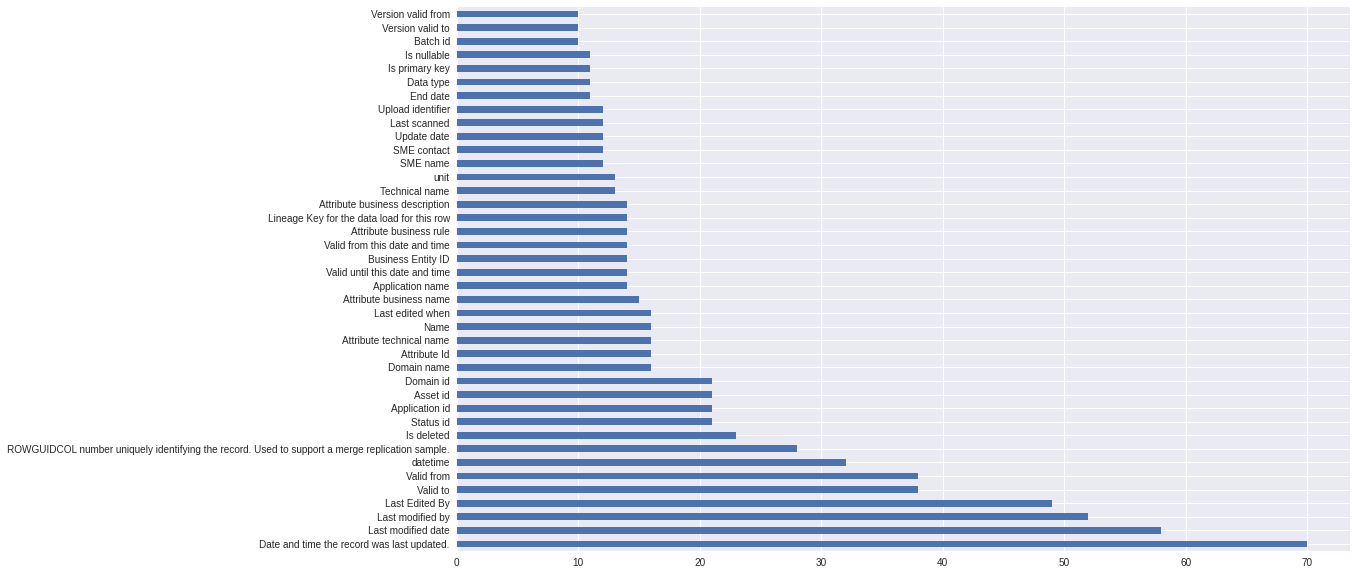

In [20]:
data["Attribute_Business_Name"].value_counts()[:40].plot(kind="barh")
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()

In [21]:
data["Attribute_Technical_Name"].astype(str)

0                                 ID
1                            GNDR_CD
2                    LIVG_ARNGMNT_CD
3                       MRTL_STUS_CD
4                         OCUPATN_CD
                    ...             
4128    Config_AssetList_Data_Source
4129           Attribute_Sample_Data
4130                   Property_IsDQ
4131         Property_DQ_Calculation
4132       Property_DQ_Output_Format
Name: Attribute_Technical_Name, Length: 4133, dtype: object

### Exploring Basic Models

First we will try to generate the Business Name from the technical name, which should be a relatively straightforward problem. 

There are two basic approaches we can try. 

1. Similarity-based Model
2. Rule-based Model

Text preprocessing:
- try removing contractions (last step)
- strip whitespaces
- remove underscores
- evtl. remove numbers (if it makes sense, for some data sets that might be a terrible idea --> genetic data/loci information etc.)
- remove accentuation
- remove special characters
- evtl. remove punctuation
- is lemmatization possible?
- remove tabs (if there even are any)
- change everything to lowercase
- IDEA: Use probabilistic word expansion [source](https://loeb.nyc/blog/data-science-word-expander) (Word_expander) to expand abbreviated technical names? Symspell 


In [22]:
# preprocess and normalize Text

# in case text not english
def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

# preprocessing
def pre_process_text(labels):
  norm_docs = []
  for string in tqdm.tqdm(labels):
    string = string.replace("_", " ")
    string = string.translate(string.maketrans("\n\t\r", "   "))
    string = remove_accented_chars(string) 
    # and inset a space where a number follows a letter et vice versa
    string = re.sub(r'(?<=\d)(?=[^\d\s])|(?<=[^\d\s])(?=\d)', ' ', string)
    # insert space where an uppercase letter follows a lowercase letter
    string = re.sub(r"(?<![A-Z\W])(?=[A-Z])", " ", string)
    string = contractions.fix(string)
    # where XXXX number to XXXX number replace - with to IN PROGRESS
    string = string.replace("-", " to ")
    # remove special characters or whitespaces
    string = re.sub(r"[^a-zA-Z0-9\s]", "", string, flags=re.I|re.A)
    string = string.lower()
    string = string.strip()
    string = string.split(" ")
    norm_docs.append(string)
  return norm_docs

In [23]:
list1 = ["PAF1234567","ABC123553", "hep3", "obsolete_3"]
pre_process_text(list1)

100%|██████████| 4/4 [00:00<00:00, 4437.24it/s]


[['paf', '1234567'], ['abc', '123553'], ['hep', '3'], ['obsolete', '3']]

In [24]:
data["Attribute_Technical_Name"]

0                                 ID
1                            GNDR_CD
2                    LIVG_ARNGMNT_CD
3                       MRTL_STUS_CD
4                         OCUPATN_CD
                    ...             
4128    Config_AssetList_Data_Source
4129           Attribute_Sample_Data
4130                   Property_IsDQ
4131         Property_DQ_Calculation
4132       Property_DQ_Output_Format
Name: Attribute_Technical_Name, Length: 4133, dtype: object

In [25]:
#paf = data[data['Attribute_Technical_Name'].str.startswith('P_AF')]
# data.Attribute_Technical_Name.str.startswith('Paf')
#data_no_paf = data[~data['Attribute_Technical_Name'].isin(['P_AF'])]
data_no_paf = data[data['Attribute_Technical_Name'].str.contains("P_AF")==False]

In [26]:
data_no_paf

,Domain_Id,Domain_Name,Domain_Desc,Domain_Code,Domain_Status,Domain_Status_Code,Application_Id,Application_Name,Application_Code,Application_Desc,Application_Status,Application_Status_Code,Asset_Id,Asset_Technical_Name,Asset_Business_Name,Asset_Business_Desc,Asset_Status,Asset_Status_Code,Asset_Server_Name,Asset_Database,Asset_Schema,Asset_Type_Id,Asset_Type_Name,Asset_Type_Desc,Privacy_Level_Id,Asset_Privacy_Level,Asset_Privacy_Desc,Attribute_Id,Attribute_Technical_Name,Attribute_Business_Name,Attribute_Business_Desc,Attribute_Business_Rule,Attribute_Data_Type,Attribute_IsPK,Attribute_IsNullable,Attribute_Status,Attribute_Status_Code
0,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,1,ID,Technical Id of the patient,The Primary Key (surrogate unique identifier) ...,NaN,NUMBER (38),Yes,Yes,Active,1
1,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,2,GNDR_CD,Gender Code,Code of GENDER CODE defined as: The gender of ...,"If Gender code = M then Male, F = Female, or U...",VARCHAR2 (80),No,No,Active,1
2,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,3,LIVG_ARNGMNT_CD,Living arrangement,Code of LIVING ARRANGEMENT CODE defined as: A ...,NaN,VARCHAR2 (80),No,No,Active,1
3,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,4,MRTL_STUS_CD,Marital status code,Code of MARITAL STATUS CODE defined as: Party'...,NaN,VARCHAR2 (80),No,No,Active,1
4,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,5,OCUPATN_CD,Occupation code,Code of OCCUPATION CODE defined as: The occupa...,NaN,VARCHAR2 (80),No,No,Active,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,106,Config_AssetList,Configuration asset list,Contains all the required parameters to launch...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4456,Config_AssetList_Data_Source,Config AssetList Data Source,Data source for the scan,NaN,nvarchar (64),No,Yes,Active,1
4129,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,87,Attribute,Attribute,Contains the list of attributes that character...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4457,Attribute_Sample_Data,Attribute sample data,Sample data of the attribute.,NaN,nvarchar (MAX),No,Yes,Active,1
4130,7,ICT,ICT department,I

In [27]:
data["prep_tech_data"] = pre_process_text(data["Attribute_Technical_Name"])

100%|██████████| 4133/4133 [00:00<00:00, 53255.73it/s]


In [28]:
data["prep_business_data"]= pre_process_text(data["Attribute_Business_Name"])

100%|██████████| 4133/4133 [00:00<00:00, 50712.51it/s]


100%|██████████| 3941/3941 [00:00<00:00, 13333.97it/s]


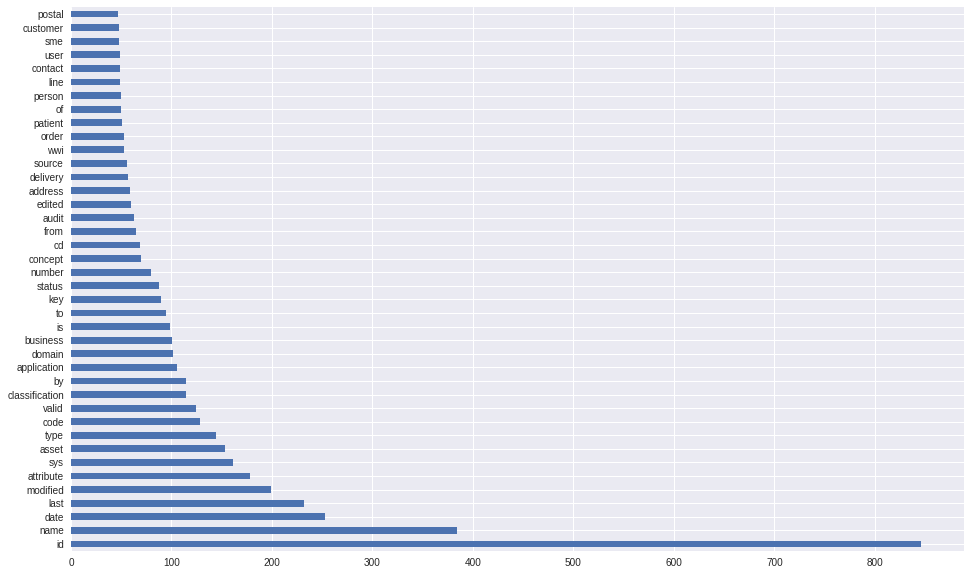

In [51]:
prep_tech_data = pre_process_text(data_no_paf["Attribute_Technical_Name"])
tech_word_list = sum(prep_tech_data, [])
tech_word_series = pd.Series(tech_word_list)
tech_word_series.value_counts()[:40].plot(kind="barh")
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()

100%|██████████| 3941/3941 [00:00<00:00, 23712.92it/s]


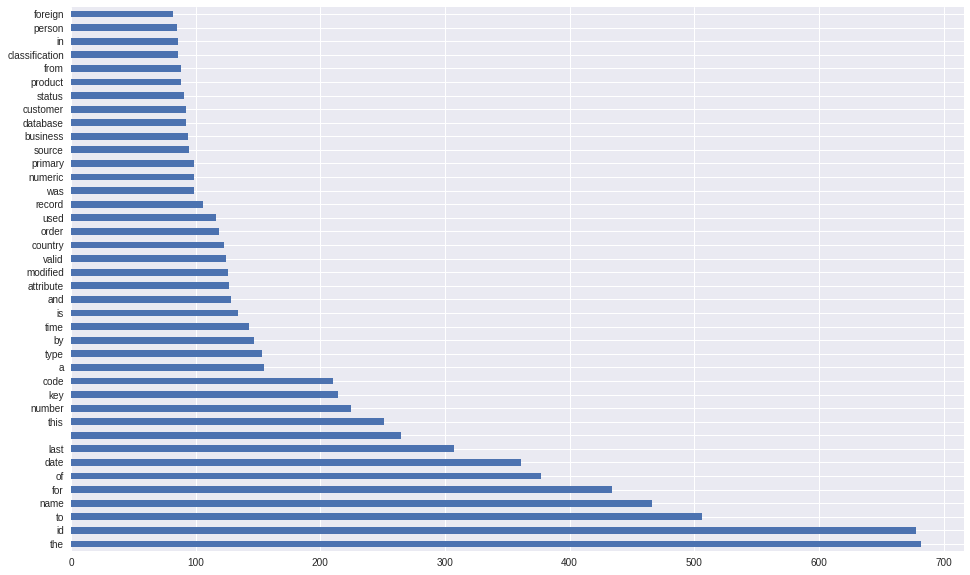

In [30]:
prep_business_data= pre_process_text(data_no_paf["Attribute_Business_Name"])
business_word_list = sum(prep_business_data, [])
business_word_series = pd.Series(business_word_list)
business_word_series.value_counts()[:40].plot(kind="barh")
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()

## !!! TODO: value_counts and NUNIQUE for each business/tehcnical name and each business/tewchnical word!!!!!! --> REDUCE NUMBER OF INPUT CATEGORIES

AND because we need to know MAX_VOCAB_SIZE for fasttext (nunique may be no higher than 75% of MAX_VOCAB_SIZE)

In [55]:
# word level number of unique values
print(business_word_series.nunique())
print(tech_word_series.nunique())
print(business_word_series.nunique()-tech_word_series.nunique())

1351
994
357


In [58]:
# label level number of unique values
print(data["Attribute_Business_Name"].nunique())
print(data["Attribute_Technical_Name"].nunique())
print(data["Attribute_Business_Name"].nunique()-data["Attribute_Technical_Name"].nunique())

2099
1998
101


Does this mean word-wise selection is wiser?

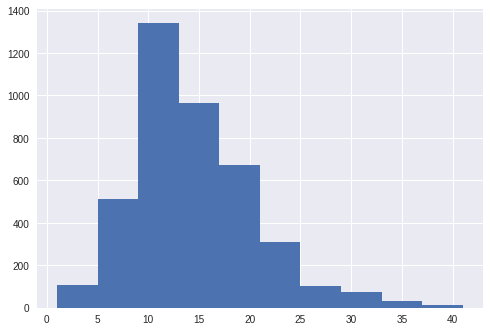

In [32]:
# histogram of string length in characters
data['Attribute_Technical_Name'].str.len().hist()
plt.show()

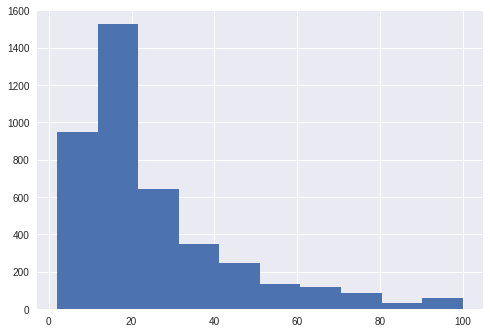

In [33]:
# as above in characters
data['Attribute_Business_Name'].str.len().hist()
plt.show()

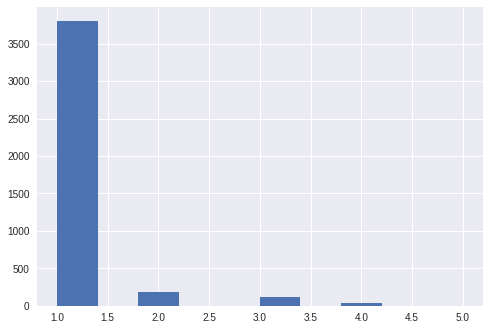

In [34]:
# histogram of string length in words
data.Attribute_Technical_Name.str.split().\
    map(lambda x: len(x)).\
    hist()
plt.show()

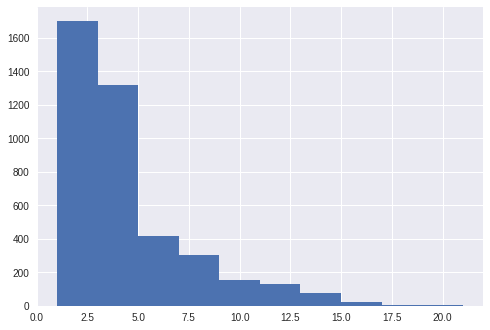

In [35]:
# histogram of string length in words
data.Attribute_Business_Name.str.split().\
    map(lambda x: len(x)).\
    hist()
plt.show()

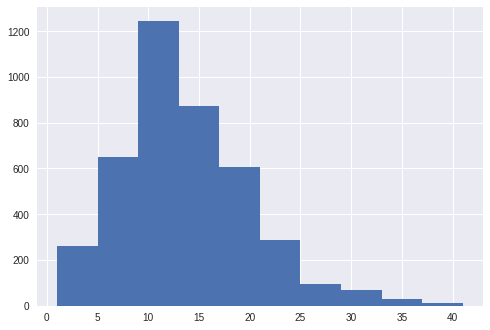

In [36]:
# average word length
data['Attribute_Technical_Name'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.show()

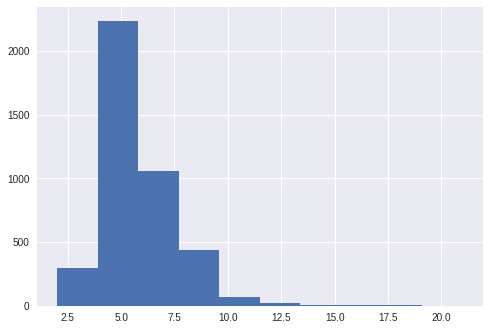

In [37]:
# average word length
data['Attribute_Business_Name'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.show()

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
corpus=[]
new= data_no_paf['Attribute_Business_Name'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [40]:
# Code Snippet for Top Stopwords Barchart

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)


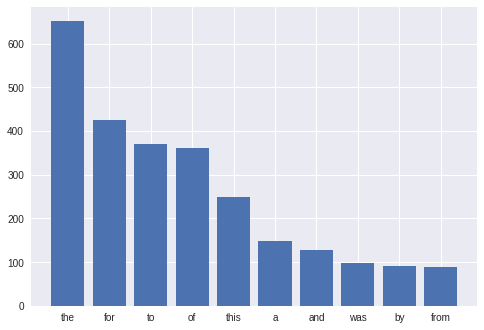

In [41]:

plot_top_stopwords_barchart(data_no_paf['Attribute_Business_Name'])

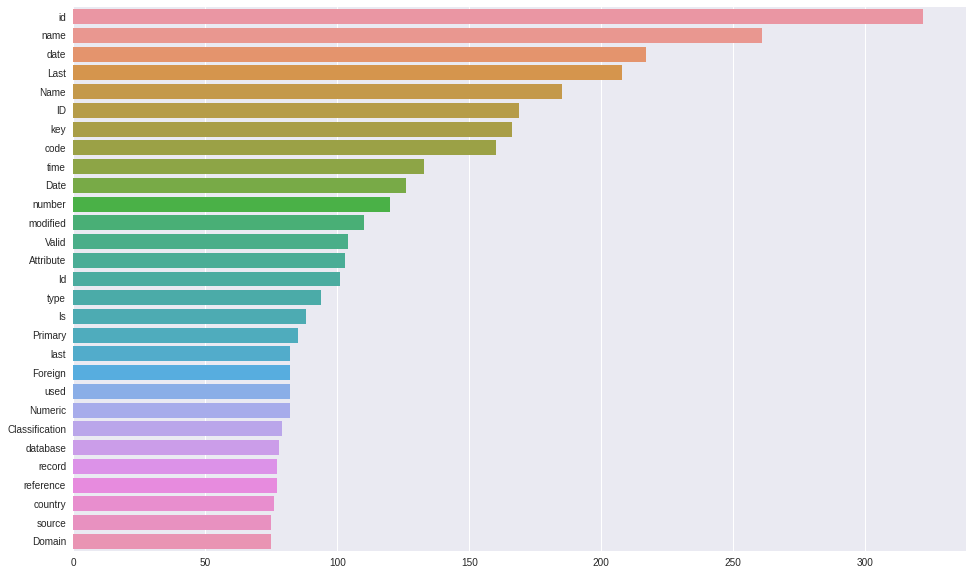

In [42]:
from collections import Counter

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()

In [43]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [44]:
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

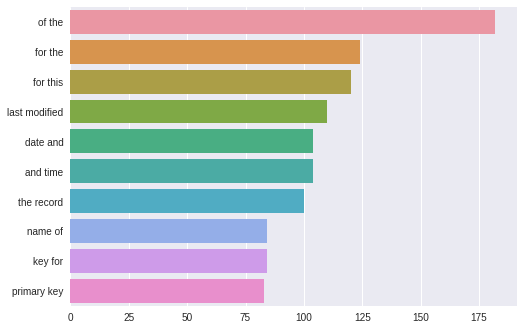

In [45]:
top_n_bigrams_attribute_business_name = get_top_ngrams(data_no_paf["Attribute_Business_Name"],2)[:40]
x,y=map(list,zip(*top_n_bigrams_attribute_business_name)) 
sns.barplot(x=y,y=x)
plt.show()

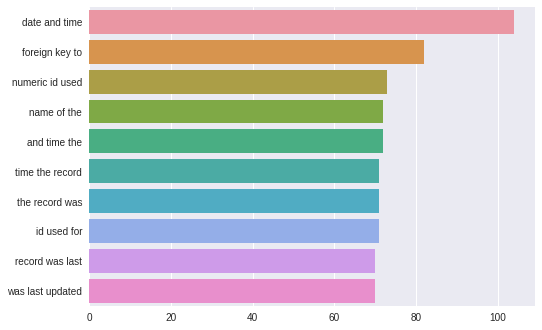

In [46]:
top_tri_grams_attribute_business_name=get_top_ngrams(data_no_paf['Attribute_Business_Name'],n=3)
x,y=map(list,zip(*top_tri_grams_attribute_business_name))
sns.barplot(x=y,y=x)
plt.show()

In [47]:
# let's try topic modelling with pycaret instead
# https://towardsdatascience.com/topic-modeling-on-pycaret-2ce0c65ba3ff
!pip install --upgrade pycaret

     |████████████████████████████████| 301 kB 9.3 MB/s 
     |████████████████████████████████| 114 kB 56.6 MB/s 
     |████████████████████████████████| 261 kB 50.3 MB/s 
     |████████████████████████████████| 2.0 MB 46.9 MB/s 
     |████████████████████████████████| 1.7 MB 57.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 6.1 MB/s 
     |████████████████████████████████| 86 kB 8.6 MB/s 
     |████████████████████████████████| 1.3 MB 55.6 MB/s 
     |████████████████████████████████| 15.6 MB 52.5 MB/s 
     |████████████████████████████████| 6.8 MB 46.0 MB/s 
     |████████████████████████████████| 167 kB 78.4 MB/s 
     |████████████████████████████████| 102 kB 16.0 MB/s 
     |████████████████████████████████| 303 kB 71.4 MB/s 
     |████████████████████████████████| 636 kB 77.2 MB/s 
     |█████████████████

In [48]:
!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora


[autoreload of sklearn.base failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ValueError: clone() requires a code object with 0 free vars, not 5
]
[autoreload of sklearn.utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ValueError: safe_sqr() requires a code object with 0 free vars, not 5
]
[autoreload of scipy.sparse.sputils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name 'prod' from 'scipy._lib._util' (/usr/local/lib/python3.7/dist-packages/scipy/_lib/_util.py)
]
[autoreload of scipy.sparse.bsr failed: Traceback (most recent call last)

     |████████████████████████████████| 12.0 MB 7.8 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [49]:
from pycaret.nlp import *
import scipy.linalg

In [50]:
# initialize the setup
nlp = setup(data = data, target = "Attribute_Business_Name", session_id = 42)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


IntProgress(value=0, description='Processing: ', max=11)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:07:44
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Step,. . . . . . . . . . . . . . . . . .,Step 0 of 9


AttributeError: ignored

In [ ]:
lda = create_model('lda', num_topics = 10, multi_core = True)

In [ ]:
df_lda = assign_model(lda)

In [ ]:
df_lda.head()

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

 PyCarets offers a variety of plots. The type of graph generated will depend on the plot parameter. Here is the list of currently available visualizations:
- ‘frequency’: Word Token Frequency (default)
- ‘distribution’: Word Distribution Plot
- ‘bigram’: Bigram Frequency Plot
- ‘trigram’: Trigram Frequency Plot
- ‘sentiment’: Sentiment Polarity Plot
- ‘pos’: Part of Speech Frequency
- ‘tsne’: t-SNE (3d) Dimension Plot
- ‘topic_model’ : Topic Model (pyLDAvis)
- ‘topic_distribution’ : Topic Infer Distribution
- ‘wordcloud’: Word cloud
- ‘umap’: UMAP Dimensionality Plot

In [ ]:
plot_model(lda, plot="topic_model")
plot_model(lda, plot="topic_distribution")

In [ ]:
plot_model(lda, plot='frequency', topic_num = 'Topic 1')


broken approach following

In [ ]:
import nltk
from nltk import PorterStemmer, WordNetLemmatizer, word_tokenize 
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for label in data['Attribute_Business_Name']:
        words=[w for w in word_tokenize(label) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(data)

In [ ]:
!pip install gensim

In [ ]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()


In [ ]:
!pip install pyldavis

In [ ]:
# Code Snippet for Creating LDA visualization

import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for label in text:
            words=[w for w in word_tokenize(label) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

In [ ]:
pip install git+https://github.com/NBCLab/abbr

In [ ]:
import abbr

In [ ]:
from abbr import findall, expandall


In [ ]:
#prep_data = " ".join(prep_data)
abbr_data= []
for string in prep_data:
  map_object = map(expandall, string)
  new_list = list(map_object)
  abbr_data.append(new_list) 


In [ ]:
# abbr did nothing: BOO!
list_difference = [item for item in abbr_data if item not in prep_data]
list_difference

In [ ]:
# install autocorrect
!pip install autocorrect

In [ ]:
from autocorrect import Speller
# autocorrect will run faster as a numpy array

In [ ]:
def autocorrect(doc):
  autocorr_doc = []
  spell = Speller() #spell(data)
  # use lambda function and list comprehension to loop over strings
  autocorr_text = [spell(x) for x in doc]
  autocorr_doc.append(autocorr_text)
  return autocorr_text #autocorr_doc

In [ ]:
autocorrect(prep_data)


In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

<div style="background:#EEEDF5;color:#303030"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    This Markdown cell is a template to write extended comments. e.g. explain the approach taken, or concepts behind algorithm chosen. Aim at having 2 lines at least. Anything smaller can be directly integrated in the code, or gathered together with other comments to form a bigger paragraph. Since this block is within a div element, you need to use html formatting syntax, not markdown
</div>

<div style="background:#EEEDF5;border:0.1cm solid #FDB100;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#FDB100">Title:</b> 
        This is a an example yellow box
    </div>
</div>

<div style="background:#EEEDF5;border:0.1cm solid #00BAE5;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#00BAE5">Note:</b>
        This is an example Blue Box
    </div>
</div>

<div style="background:#EEEDF5;border:0.1cm solid #EF475B;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#EF475B">Warning:</b> 
        This is an example red box
    </div>
</div>

<a id='P2' name="P2"></a>
## [Part 2 title here](#P0)

<a id='P3' name="P3"></a>
## [Part 3 title here](#P0)

<a id='CL'></a>
## [Conclusion](#P0)

This is a pre-written conclusion in which we have nice figures.

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>